# Interactions plot

Most explainability plots only allow the user to analyze one variable at a time. 

**Interactions plots are an interesting way to visualize a couple of variables and their corresponding contribution to the model output.**

Shapash integrates two methods that allow to display such interactions for several individuals : `interactions_plot` and `top_interactions_plot`.

<b>This tutorial </b>presents how to use both methods to get more insights about your model and how two variables interact with it.

Content :
- Loading dataset and fitting a model
- Declare and compile Shapash smart explainer
- Plot top interaction values
- Plot a chosen couple of variables

We used Kaggle's [Titanic](https://www.kaggle.com/c/titanic/data) dataset

In [1]:
import pandas as pd
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

## Building Supervized Model 
Load Titanic data

In [3]:
from shapash.data.data_loader import data_loading
titanic_df, titanic_dict = data_loading('titanic')
del titanic_df['Name']
y_df=titanic_df['Survived']
X_df=titanic_df[titanic_df.columns.difference(['Survived'])]

In [4]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,Third class,male,22.0,1,0,7.25,Southampton,Mr
2,1,First class,female,38.0,1,0,71.28,Cherbourg,Mrs
3,1,Third class,female,26.0,0,0,7.92,Southampton,Miss
4,1,First class,female,35.0,1,0,53.10,Southampton,Mrs
5,0,Third class,male,35.0,0,0,8.05,Southampton,Mr


In [5]:
from category_encoders import OrdinalEncoder

categorical_features = [col for col in X_df.columns if X_df[col].dtype == 'object']

encoder = OrdinalEncoder(
    cols=categorical_features,
    handle_unknown='ignore',
    return_df=True).fit(X_df)

X_df=encoder.transform(X_df)

Train / Test Split + model fitting

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, train_size=0.75, random_state=7)

In [7]:
clf = XGBClassifier(n_estimators=200,min_child_weight=2).fit(Xtrain,ytrain)

## Declare and Compile SmartExplainer

In [8]:
from shapash.explainer.smart_explainer import SmartExplainer

In [9]:
response_dict = {0: 'Death', 1:' Survival'}

In [10]:
xpl = SmartExplainer(features_dict=titanic_dict, # Optional parameters
                     label_dict=response_dict) # Optional parameters, dicts specify labels 

In [11]:
xpl.compile(
    x=Xtest,
    model=clf,
    preprocessing=encoder, # Optional: compile step can use inverse_transform method
)

Backend: Shap TreeExplainer


## Plot top interactions

Now we may want to analyze our model and in particular how some variables combinations influence the output.

**Shapash allows to quickly inspect your model by showing the variables for which there is the highest chance to get interesting interactions.**

To do so you can use the following method (use the button to see the different variables interactions) :

In [ ]:
xpl.plot.top_interactions_plot(nb_top_interactions=5)

## Plot interactions between two selected variables

If you want to display a particular couple of interactions just use the following method with the chosen features (here 'Sex' and 'Pclass'):

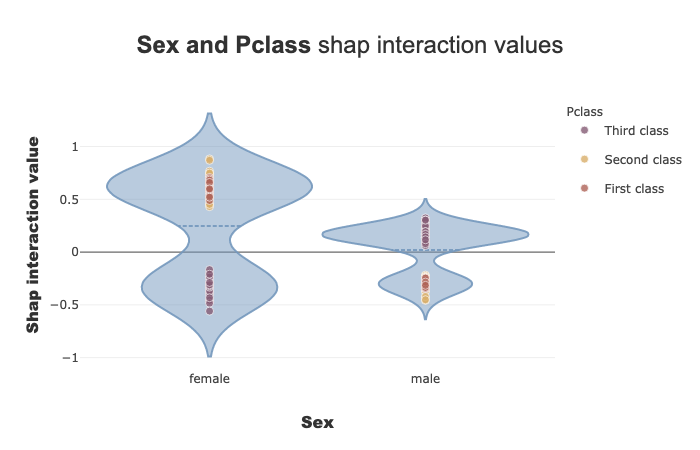

In [12]:
xpl.plot.interactions_plot('Sex', 'Pclass')

As a quick analysis we can see on the plot that **the model learned the following points** :
- Female passengers have :
    - Highest chance of surviving when belonging to first or second class 
    - Less chance of surviving when belonging to third class
- On the contrary, male passengers have :
    - Highest chance of surviving when belonging to the third class
    - Less chance of surviving when belonging to first or second class